# Инструментальные средства ИИ
# Лабораторная работа 4
## Касаткина В.Д. группа N4170

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras import layers
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

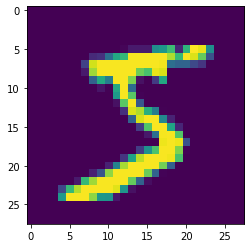

In [3]:
plt.imshow(X_train[0])#Пример данных

In [4]:
X_train[0][5] #Данные не нормализованы

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
#Приведем к необходимому формату 
X_train = X_train.reshape(60000, 28, 28, 1) # 60000*[ширина, высота, канал]
X_test = X_test.reshape(10000, 28, 28, 1) # 10000*[ширина, высота, канал]

In [7]:
#Нормализация данных в интервале 0-1 
X_train = X_train/255
X_test = X_test/255

In [8]:
y_test #Необходимо преобразование данных 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
#Преобразование в массивы с вероятностями 
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [10]:
X_test.shape

(10000, 28, 28, 1)

In [11]:
#1 уровень модели - сверточный
#2 уровень модели - обьединяющий
#3 уровень модели - сверточный
#4 уровень модели - обьединяющий
#5 уровень модели - преобразование к необходимой размерности
#6-7 уровень модели - уровни классификации 
model = Sequential(
    [
        layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',
                      input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Flatten(), 
        layers.Dense(units = 128, activation = 'relu'), 
        layers.Dense(units = 10, activation = 'softmax'), 
    ]
)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
            metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64,validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/5
844/844 [==============================] - 65s 76ms/step - loss: 0.1454 - accuracy: 0.9551 - val_loss: 0.0520 - val_accuracy: 0.9848
Epoch 2/5
844/844 [==============================] - 59s 70ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0362 - val_accuracy: 0.9893
Epoch 3/5
844/844 [==============================] - 64s 75ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0449 - val_accuracy: 0.9882
Epoch 4/5
844/844 [==============================] - 57s 68ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0370 - accuracy: 0.9894


In [14]:
print(loss)
print(accuracy)

0.03697063773870468
0.9894000291824341


In [15]:
X_test.shape

(10000, 28, 28, 1)

In [16]:
pred = model.predict(X_test)
incorr = []
img = X_test.reshape(10000, 28,28)
#Вывод неверно классифицированных обьектов 
for i in range(len(y_test)):
    if np.argmax(pred[i]) != np.argmax(y_test[i]):
        incorr.append([i, img[i], np.argmax(pred[i]), np.argmax(y_test[i])])

313/313 [==============================] - 4s 11ms/step


In [17]:
len(incorr)

106

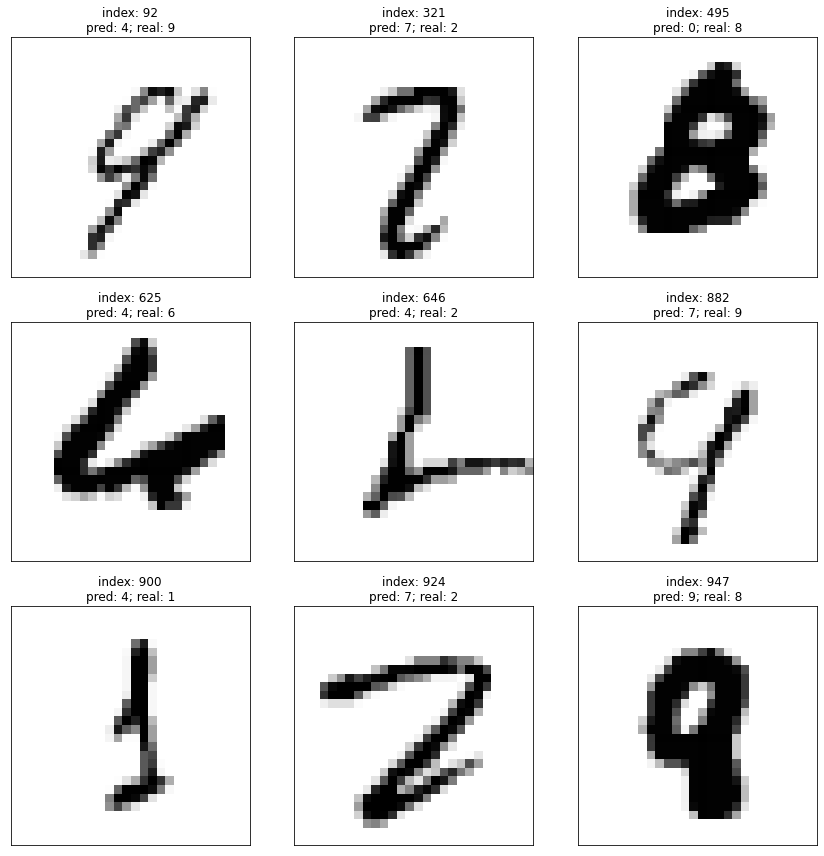

In [18]:
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for axes, item in zip(axes.ravel(), incorr):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([]) 
    axes.set_title(f'index: {index}\npred: {predicted}; real: {expected}')
plt.tight_layout()

In [19]:
def prob(pred):
    for i, p in enumerate(pred):
        print(i, ' : ',  p)

In [20]:
for i in range (5):
    prob(pred[i])
    print('-----------------------')

0  :  1.2548571e-07
1  :  2.6264479e-08
2  :  4.717918e-08
3  :  5.3274056e-07
4  :  1.3652391e-12
5  :  3.969899e-09
6  :  1.656821e-12
7  :  0.99999917
8  :  8.5996193e-10
9  :  1.8208955e-07
-----------------------
0  :  5.993981e-08
1  :  1.10025184e-07
2  :  0.99999976
3  :  4.3078087e-16
4  :  1.1130683e-11
5  :  4.035416e-18
6  :  1.7118952e-08
7  :  1.5706834e-12
8  :  2.283765e-13
9  :  6.849003e-14
-----------------------
0  :  8.390713e-07
1  :  0.9999566
2  :  5.8871706e-07
3  :  1.2371074e-09
4  :  3.6560967e-05
5  :  1.549871e-06
6  :  8.7563785e-07
7  :  2.8654765e-06
8  :  8.807e-08
9  :  3.7510834e-08
-----------------------
0  :  0.99996793
1  :  2.0988506e-09
2  :  1.0553503e-09
3  :  8.4112894e-10
4  :  1.1743096e-09
5  :  7.539745e-10
6  :  3.2053133e-05
7  :  4.396926e-08
8  :  1.2055634e-08
9  :  1.3955575e-08
-----------------------
0  :  1.0028662e-09
1  :  3.1170306e-11
2  :  4.82338e-11
3  :  8.881182e-12
4  :  0.9999999
5  :  7.314217e-12
6  :  2.2751314e-09